In [1]:
## Currently Data
import covid_mx

# Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import pandas.plotting as pp

# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# plt.style.use('fivethirtyeight')
from tabulate import tabulate

# statistics
from statsmodels.tsa.api import Holt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
## Load Data
df = covid_mx.load_data()
## specific column to analyze
dfObj = covid_mx.prepare_data(df,'Confirmed')

# Confirmed cases in México (Daily)

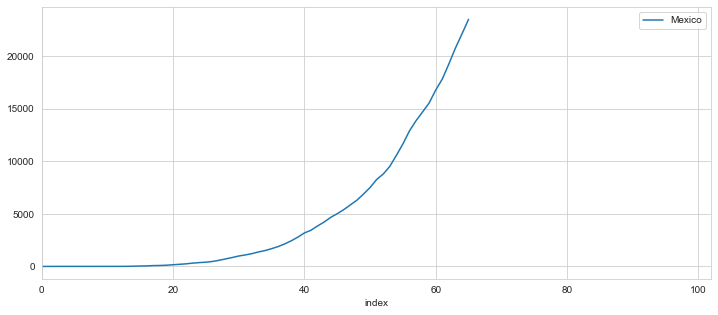

In [3]:
# Plotting Days in México "confirmed cases"
dfObj['Mexico'].plot(legend=True,figsize=(12,5))

## Model

In [4]:
## Subset Mexico and the world,  same pandemic days
df_mx = dfObj['Mexico']
# Drop rows with missing Confirmed values
df_mx = df_mx.dropna()
# df_mx.index.max()

data = pd.Series(df_mx)
data = data.astype('double')

model = Holt(data, exponential=True).fit(
    smoothing_level=.8, # alpha
    smoothing_slope=.5,  # beta
    optimized=False)



In [5]:
print(model.summary().tables[1])

                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8000000                alpha                False
smoothing_slope            0.5000000                 beta                False
initial_level              1.0000000                  l.0                False
initial_slope              4.0000000                  b.0                False
------------------------------------------------------------------------------


In [6]:
## Forecast

In [7]:
print(model.forecast(10).round())

66    25111.0
67    26809.0
68    28621.0
69    30557.0
70    32623.0
71    34828.0
72    37183.0
73    39697.0
74    42381.0
75    45247.0
dtype: float64


Fg: Cases in Mexico Forecast.


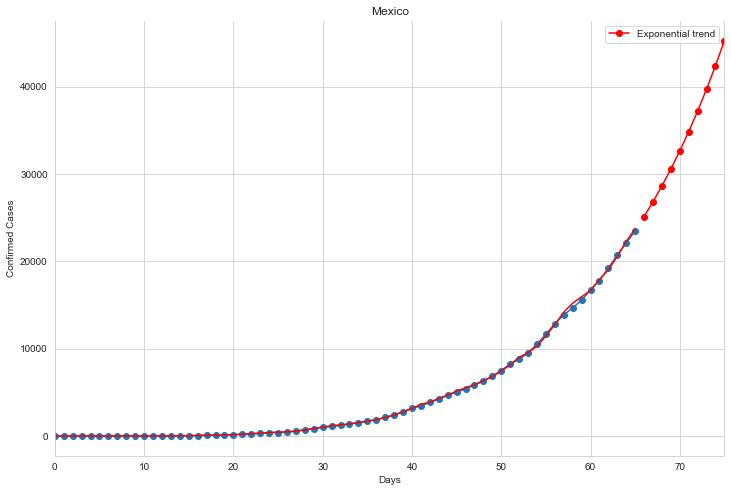

In [8]:
fcast = model.forecast(10).rename("Exponential trend")
print("Fg: Cases in Mexico Forecast.")
ax = data.plot( marker="o", figsize=(12,8)) # color="blue",
model.fittedvalues.plot(ax=ax, color='red')
fcast.plot(ax=ax, color='red', marker="o", legend=True)
ax.set_title("Mexico")
ax.set_xlabel("Days")
ax.set_ylabel("Confirmed Cases")
ax.spines["top"].set_alpha(0)
plt.show()
